In [1]:
import os
from sys import argv, stdout, stderr
from ROOT import TCanvas, TLegend, gROOT, gStyle, TFile, TIter, gSystem
import sys

Welcome to JupyROOT 6.10/09


In [2]:
gROOT.SetStyle("Default")
gROOT.SetBatch(True)

1754397.0
1620933.0
1539013.0
1521028.0


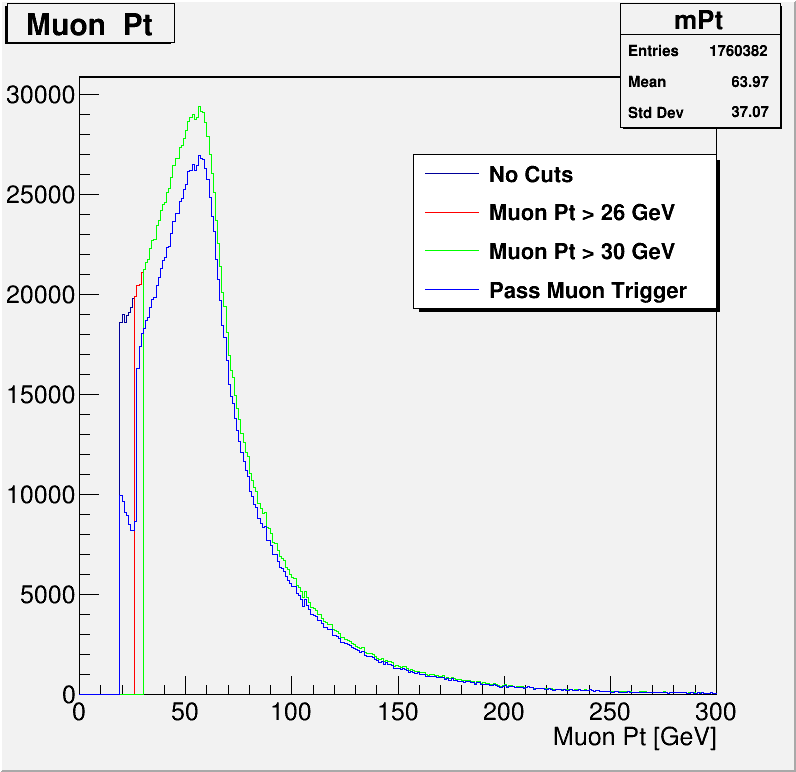

In [9]:
canvas = TCanvas("canvas","canvas",800,800)
legend = TLegend(0.52,0.6,0.9,0.8)
file = 'signal.root'
MuTaufile = TFile(file)
lfv_histo = MuTaufile.Get('mt')
hlist = lfv_histo.GetListOfKeys()
iter = TIter(hlist)
for i in iter:
    if i.GetName()=='mPt':
        mpt_histo1 = MuTaufile.Get('mt/'+i.GetName())
        mpt_histo2 = MuTaufile.Get('pass26cut/'+i.GetName())
        mpt_histo3 = MuTaufile.Get('pass30cut/'+i.GetName())
        mpt_histo4 = MuTaufile.Get('passtrigger/'+i.GetName())
        print mpt_histo1.Integral()
        print mpt_histo2.Integral()
        print mpt_histo3.Integral()
        print mpt_histo4.Integral()
        mpt_histo1.GetXaxis().SetTitle("Muon Pt [GeV]")
        mpt_histo2.SetLineColor(2)
        mpt_histo3.SetLineColor(3)
        mpt_histo4.SetLineColor(4)
        mpt_histo1.Draw("hist")
        mpt_histo2.Draw("hist SAME")
        mpt_histo3.Draw("hist SAME")
        mpt_histo4.Draw("hist SAME")
legend.AddEntry(mpt_histo1,"No Cuts","l")
legend.AddEntry(mpt_histo2,"Muon Pt > 26 GeV","l")
legend.AddEntry(mpt_histo3,"Muon Pt > 30 GeV","l")
legend.AddEntry(mpt_histo4,"Pass Muon Trigger","l")
legend.Draw()
canvas.Draw()